In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importing Necessary Libraries 

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.applications import MobileNetV2, DenseNet121

# Distribution of Images across classes

In [3]:
train_dir = "./data/train"
test_dir = "./data/test"

print("Train set:\n========================================")
print("Healthy=",len(os.listdir('./data/train/Healthy')))
print("Type 1 disease=",len(os.listdir('./data/train/Type 1 disease')))
print("Type 2 disease=",len(os.listdir('./data/train/Type 1 disease')))

print('')
print("Test set:\n========================================")
print("Healthy=",len(os.listdir('./data/test/healthy')))
print("Type 1 disease=",len(os.listdir('./data/test/Type 1 disease')))
print("Type 2 disease=",len(os.listdir('./data/test/Type 1 disease')))

Train set:
Healthy= 70
Type 1 disease= 111
Type 2 disease= 111

Test set:
Healthy= 20
Type 1 disease= 26
Type 2 disease= 26


# Sample image for all classes

Training set

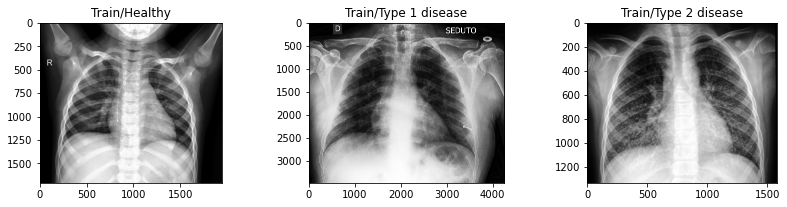

In [4]:
plt.figure(figsize=(14,10))
plt.subplot(3, 3, 1)
plt.title('Train/Healthy')
img1 = plt.imread("./data/train/Healthy/01.jpeg")
plt.imshow(img1, cmap='gray')
plt.subplot(3, 3, 2)
plt.title('Train/Type 1 disease')
img2 = plt.imread("./data/train/Type 1 disease/01.jpeg")
plt.imshow(img2, cmap='gray')
plt.subplot(3, 3, 3)
plt.title('Train/Type 2 disease')
img2 = plt.imread("./data/train/Type 2 disease/01.jpeg")
plt.imshow(img2, cmap='gray')
plt.show()

Test set

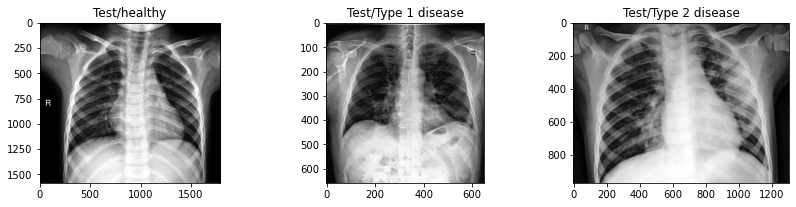

In [5]:
plt.figure(figsize=(14,10))
plt.subplot(3, 3, 1)
plt.title('Test/healthy')
img1 = plt.imread("./data/test/healthy/0101.jpeg")
plt.imshow(img1, cmap='gray')
plt.subplot(3, 3, 2)
plt.title('Test/Type 1 disease')
img2 = plt.imread("./data/test/Type 1 disease/0100.jpeg")
plt.imshow(img2, cmap='gray')
plt.subplot(3, 3, 3)
plt.title('Test/Type 2 disease')
img2 = plt.imread("./data/test/Type 2 disease/0101.jpeg")
plt.imshow(img2, cmap='gray')
plt.show()

# Data Argumentor 

In [6]:
train_datagen = ImageDataGenerator(width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  rescale = 1./255,
                                  horizontal_flip = True,
                                  rotation_range=20,
                                  shear_range=0.1,
                                  zoom_range=0.1)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size = 8, 
                                                target_size = (48, 48))

Found 251 images belonging to 3 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

testing_set = test_datagen.flow_from_directory(test_dir,
                                              batch_size = 1, 
                                              target_size = (48, 48))

Found 66 images belonging to 3 classes.


# CNN model

Model structure 

In [8]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(48, 48, 3)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=3, activation='Softmax'))

In [9]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 128)       36992     
                                                                 
 batch_normalization_1 (Batc  (None, 44, 44, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 128)      0         
 )                                                               
                                                        

Training the model

In [10]:
# defining early stopping
es = EarlyStopping(monitor='accuracy', patience=2)

# model training using generator
result = model.fit_generator(training_set, validation_data = testing_set,
                   callbacks=[es],
                   epochs = 10)

Epoch 1/10
32/32 [==============================] - 43s 1s/step - loss: 0.9146 - accuracy: 0.6056 - val_loss: 1.4613 - val_accuracy: 0.3030
Epoch 2/10
32/32 [==============================] - 38s 1s/step - loss: 0.6600 - accuracy: 0.7092 - val_loss: 2.3362 - val_accuracy: 0.3030
Epoch 3/10
32/32 [==============================] - 36s 1s/step - loss: 0.5940 - accuracy: 0.7450 - val_loss: 2.6545 - val_accuracy: 0.2727
Epoch 4/10
32/32 [==============================] - 35s 1s/step - loss: 0.4925 - accuracy: 0.7769 - val_loss: 8.2380 - val_accuracy: 0.3030
Epoch 5/10
32/32 [==============================] - 36s 1s/step - loss: 0.6436 - accuracy: 0.7331 - val_loss: 4.2491 - val_accuracy: 0.3030
Epoch 6/10
32/32 [==============================] - 36s 1s/step - loss: 0.5475 - accuracy: 0.8207 - val_loss: 4.6669 - val_accuracy: 0.3030
Epoch 7/10
32/32 [==============================] - 36s 1s/step - loss: 0.4977 - accuracy: 0.8048 - val_loss: 3.6972 - val_accuracy: 0.3030
Epoch 8/10
32/32 [==

# Plot of training and validation accuracy, and the loss

Text(0.5, 1.0, 'Accuracy Evolution')

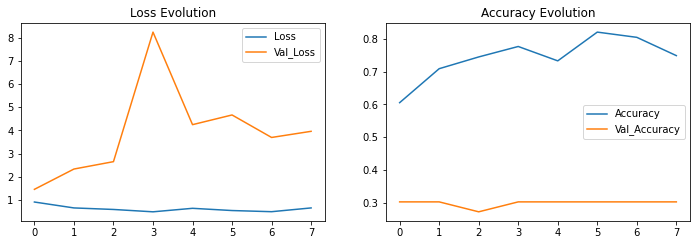

In [11]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(result.history['loss'], label='Loss')
plt.plot(result.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(result.history['accuracy'], label='Accuracy')
plt.plot(result.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

# Model output :- precision, recall the F1-score

In [12]:
pred = np.argmax(model.predict(testing_set), axis=-1)

print(confusion_matrix(testing_set.classes, pred>0.7))
pd.DataFrame(classification_report(testing_set.classes, pred>0.7, output_dict=True))

[[ 0 26  0]
 [ 0 20  0]
 [ 0 20  0]]


,0,1,2,accuracy,macro avg,weighted avg
precision,0.0,0.303030,0.0,0.30303,0.101010,0.091827
recall,0.0,1.000000,0.0,0.30303,0.333333,0.303030
f1-score,0.0,0.465116,0.0,0.30303,0.155039,0.140944
support,26.0,20.000000,20.0,0.30303,66.000000,66.000000


# Mobile net

Data preparation for Mobile net

In [13]:
training_setm = train_datagen.flow_from_directory(train_dir, 
                                                batch_size=8,
                                                color_mode='rgb',
                                                target_size = (224, 224))

testing_setm = test_datagen.flow_from_directory(test_dir,
                                              batch_size=1,
                                              color_mode='rgb',
                                              target_size = (224, 224))

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


Instance of a mobile net

In [14]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False)
mobile_net.trainable = False #keeeping mobile net weights same

Model structure

In [15]:
trf_modelm = Sequential()

trf_modelm.add(mobile_net)
trf_modelm.add(Flatten())

trf_modelm.add(Dense(units=64, activation='relu'))
trf_modelm.add(BatchNormalization())
trf_modelm.add(Dropout(0.2, seed=123))

trf_modelm.add(Dense(units=32, activation='relu'))
trf_modelm.add(BatchNormalization())

trf_modelm.add(Dense(units=3, activation='Softmax'))

In [16]:
trf_modelm.compile(optimizer=RMSprop(learning_rate=0.001),
                                    loss='categorical_crossentropy',
                                    metrics=["accuracy"])
trf_modelm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                4014144   
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)               

Training the model

In [17]:
# defining earling stopping for avoiding overfitting
esm = EarlyStopping(monitor='accuracy', patience=2)

# Model training using generator
resultm = trf_modelm.fit_generator(training_setm, validation_data = testing_setm,
                                   epochs = 10,
                                   callbacks = [esm])

Epoch 1/10
32/32 [==============================] - 57s 2s/step - loss: 0.6504 - accuracy: 0.7251 - val_loss: 4.8451 - val_accuracy: 0.2727
Epoch 2/10
32/32 [==============================] - 54s 2s/step - loss: 0.5434 - accuracy: 0.8088 - val_loss: 4.8680 - val_accuracy: 0.0909
Epoch 3/10
32/32 [==============================] - 51s 2s/step - loss: 0.3962 - accuracy: 0.8805 - val_loss: 4.3691 - val_accuracy: 0.2727
Epoch 4/10
32/32 [==============================] - 50s 2s/step - loss: 0.2897 - accuracy: 0.8805 - val_loss: 4.2303 - val_accuracy: 0.2273
Epoch 5/10
32/32 [==============================] - 52s 2s/step - loss: 0.2743 - accuracy: 0.8924 - val_loss: 5.0107 - val_accuracy: 0.1970
Epoch 6/10
32/32 [==============================] - 50s 2s/step - loss: 0.2074 - accuracy: 0.9283 - val_loss: 5.6003 - val_accuracy: 0.1212
Epoch 7/10
32/32 [==============================] - 54s 2s/step - loss: 0.2331 - accuracy: 0.9124 - val_loss: 5.6359 - val_accuracy: 0.1818
Epoch 8/10
32/32 [==

# Plot of training and validation accuracy, and the loss

Text(0.5, 1.0, 'Accuracy Evolution')

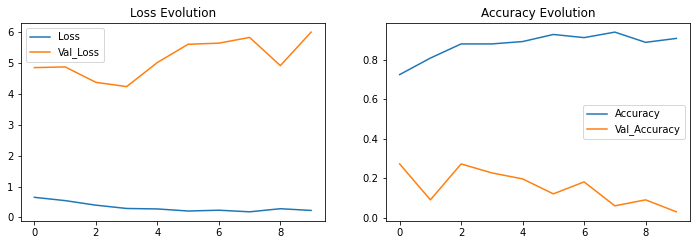

In [18]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(resultm.history['loss'], label='Loss')
plt.plot(resultm.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(resultm.history['accuracy'], label='Accuracy')
plt.plot(resultm.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

# Model output :- precision, recall the F1-score

In [20]:
predm =  np.argmax(trf_modelm.predict(testing_setm), axis=-1)

print(confusion_matrix(testing_setm.classes, predm > 0.7))
pd.DataFrame(classification_report(testing_setm.classes, predm > 0.7, output_dict=True))

[[ 8 18  0]
 [ 5 15  0]
 [ 6 14  0]]


,0,1,2,accuracy,macro avg,weighted avg
precision,0.421053,0.319149,0.0,0.348485,0.246734,0.262581
recall,0.307692,0.750000,0.0,0.348485,0.352564,0.348485
f1-score,0.355556,0.447761,0.0,0.348485,0.267772,0.275753
support,26.000000,20.000000,20.0,0.348485,66.000000,66.000000


# Densenet121

Data preparation for Densnet121

In [21]:
training_setd = train_datagen.flow_from_directory(train_dir,
                                                 batch_size=7,
                                                 target_size=(224, 224))

testing_setd = test_datagen.flow_from_directory(test_dir,
                                               batch_size=1,
                                               target_size=(224,224))

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


Instance of a Densenet121

In [22]:
den_model = tf.keras.applications.DenseNet121(input_shape=(224, 224, 3), include_top=True, weights='imagenet')

den_model.trainable = False

Model structure

In [23]:
trf_modeld = Sequential()

trf_modeld.add(den_model)
trf_modeld.add(Flatten())

trf_modeld.add(Dense(units=64, activation='relu'))
trf_modeld.add(BatchNormalization())
trf_modeld.add(Dropout(0.2, seed = 123))

trf_modeld.add(Dense(units=32, activation='relu'))
trf_modeld.add(BatchNormalization())

trf_modeld.add(Dense(units=3, activation='Softmax'))

In [24]:
trf_modeld.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
                   
trf_modeld.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1000)              8062504   
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                64064     
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                      

Training the model

In [25]:
# defining earling stopping for avoiding overfitting
esd = EarlyStopping(monitor='accuracy', patience=2)

# Model training using generator
resultd = trf_modeld.fit_generator(training_setd, validation_data=testing_setd, 
                         epochs=15,  
                         callbacks=[esd])

Epoch 1/15
36/36 [==============================] - 120s 3s/step - loss: 1.1652 - accuracy: 0.4701 - val_loss: 1.1046 - val_accuracy: 0.3030
Epoch 2/15
36/36 [==============================] - 125s 3s/step - loss: 0.7483 - accuracy: 0.7012 - val_loss: 1.1094 - val_accuracy: 0.3030
Epoch 3/15
36/36 [==============================] - 103s 3s/step - loss: 0.7195 - accuracy: 0.6653 - val_loss: 1.1185 - val_accuracy: 0.3030
Epoch 4/15
36/36 [==============================] - 101s 3s/step - loss: 0.7352 - accuracy: 0.7251 - val_loss: 1.1278 - val_accuracy: 0.3030
Epoch 5/15
36/36 [==============================] - 102s 3s/step - loss: 0.7178 - accuracy: 0.6773 - val_loss: 1.1430 - val_accuracy: 0.3030
Epoch 6/15
36/36 [==============================] - 100s 3s/step - loss: 0.6909 - accuracy: 0.7410 - val_loss: 1.1543 - val_accuracy: 0.3030
Epoch 7/15
36/36 [==============================] - 100s 3s/step - loss: 0.6003 - accuracy: 0.7371 - val_loss: 1.1710 - val_accuracy: 0.2576
Epoch 8/15
36

# Plot of training and validation accuracy, and the loss

Text(0.5, 1.0, 'Accuracy Evolution')

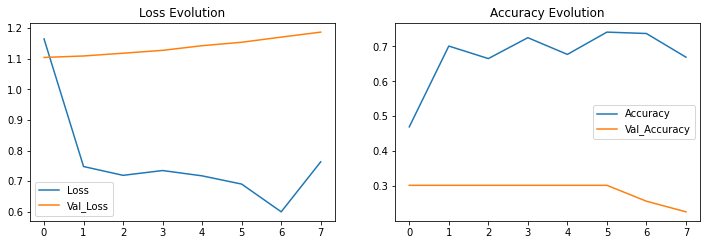

In [26]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(resultd.history['loss'], label='Loss')
plt.plot(resultd.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(resultd.history['accuracy'], label='Accuracy')
plt.plot(resultd.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

# Model output :- precision, recall the F1-score

In [27]:
predd =  np.argmax(trf_modeld.predict(testing_setd), axis=-1)

print(confusion_matrix(testing_setd.classes, predd > 0.7))
pd.DataFrame(classification_report(testing_setd.classes, predd > 0.7, output_dict=True))

[[ 7 19  0]
 [ 4 16  0]
 [ 3 17  0]]


,0,1,2,accuracy,macro avg,weighted avg
precision,0.500000,0.307692,0.0,0.348485,0.269231,0.290210
recall,0.269231,0.800000,0.0,0.348485,0.356410,0.348485
f1-score,0.350000,0.444444,0.0,0.348485,0.264815,0.272559
support,26.000000,20.000000,20.0,0.348485,66.000000,66.000000


# Comparision 

In [31]:
#CNN
print("Result for CNN")
print(pd.DataFrame(classification_report(testing_set.classes, pred>0.7, output_dict=True)))
print('')
#Mobilenet
print("Result for Mobile net")
print(pd.DataFrame(classification_report(testing_setm.classes, predm > 0.7, output_dict=True)))
print('')
#densenet121
print("Result for Densenet121")
print(pd.DataFrame(classification_report(testing_setd.classes, predd > 0.7, output_dict=True)))

Result for CNN
              0          1     2  accuracy  macro avg  weighted avg
precision   0.0   0.303030   0.0   0.30303   0.101010      0.091827
recall      0.0   1.000000   0.0   0.30303   0.333333      0.303030
f1-score    0.0   0.465116   0.0   0.30303   0.155039      0.140944
support    26.0  20.000000  20.0   0.30303  66.000000     66.000000

Result for Mobile net
                   0          1     2  accuracy  macro avg  weighted avg
precision   0.421053   0.319149   0.0  0.348485   0.246734      0.262581
recall      0.307692   0.750000   0.0  0.348485   0.352564      0.348485
f1-score    0.355556   0.447761   0.0  0.348485   0.267772      0.275753
support    26.000000  20.000000  20.0  0.348485  66.000000     66.000000

Result for Densenet121
                   0          1     2  accuracy  macro avg  weighted avg
precision   0.500000   0.307692   0.0  0.348485   0.269231      0.290210
recall      0.269231   0.800000   0.0  0.348485   0.356410      0.348485
f1-score    0.